# Introduction:

Background: Online education has become increasingly popular, especially since the COVID-19 pandemic. However, there is a debate about its effectiveness compared to traditional classroom education. The goal of this project is to analyze and compare the effectiveness of both educational methods.
Objective: To identify the factors that influence the effectiveness of online and traditional education and to compare student performance across both methods.

# Data Collection:

- Data Source: The "Students Performance in Exams" dataset from Kaggle, which includes information on student scores in three subjects: Math, Reading, and Writing.
- Data Description: The dataset includes variables such as gender, race, parental education, lunch type, test preparation, and final scores in the three subjects.

In [15]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [16]:
# Memuat dataset
df = pd.read_csv('StudentsPerformance.csv')

In [17]:
# Rename columns for convenience
df.columns = ['Gender', 'Race', 'Parental_Education', 'Lunch', 'Test_Preparation', 'Math_Score', 'Reading_Score', 'Writing_Score']


In [18]:
# Display first few rows
df.head()

,Gender,Race,Parental_Education,Lunch,Test_Preparation,Math_Score,Reading_Score,Writing_Score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [19]:
# Memeriksa missing values
df.isnull().sum()

,0
Gender,0
Race,0
Parental_Education,0
Lunch,0
Test_Preparation,0
Math_Score,0
Reading_Score,0
Writing_Score,0


In [21]:
# Encode categorical variables
df = pd.get_dummies(df, columns=['Gender', 'Race', 'Parental_Education', 'Lunch', 'Test_Preparation'], drop_first=True)

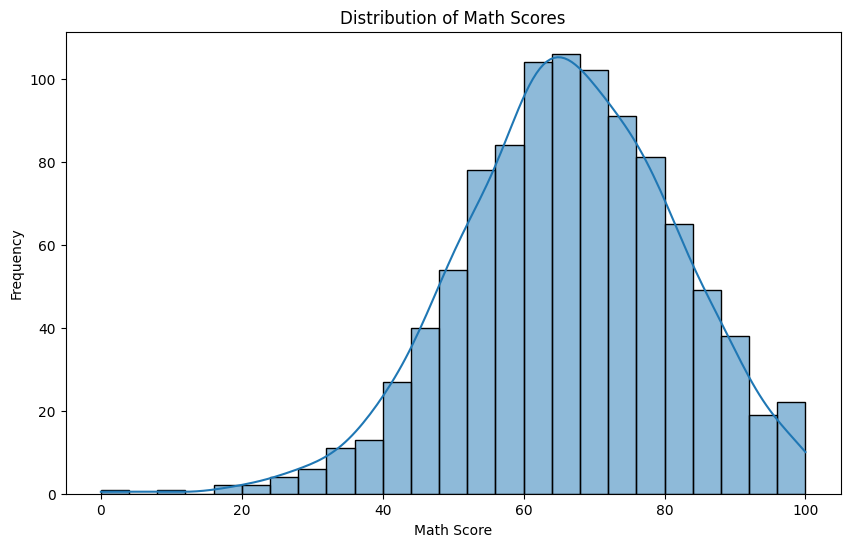

In [22]:
# Distribution of Math Scores
plt.figure(figsize=(10, 6))
sns.histplot(df['Math_Score'], kde=True)
plt.title('Distribution of Math Scores')
plt.xlabel('Math Score')
plt.ylabel('Frequency')
plt.show()

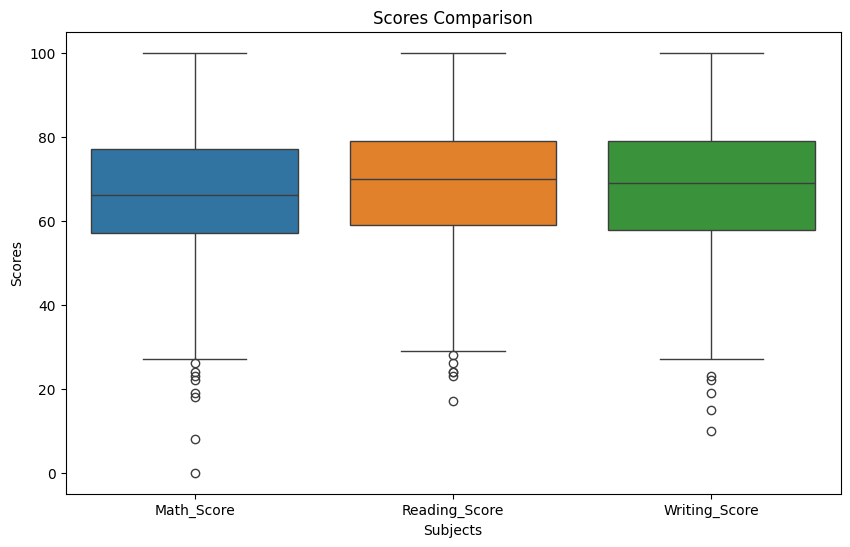

In [23]:
# Box plot to compare scores
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Math_Score', 'Reading_Score', 'Writing_Score']])
plt.title('Scores Comparison')
plt.xlabel('Subjects')
plt.ylabel('Scores')
plt.show()

In [24]:
# Statistical Analysis
mean_math = df['Math_Score'].mean()
std_math = df['Math_Score'].std()
mean_reading = df['Reading_Score'].mean()
std_reading = df['Reading_Score'].std()
mean_writing = df['Writing_Score'].mean()
std_writing = df['Writing_Score'].std()

print(f"Math - Mean: {mean_math}, Std: {std_math}")
print(f"Reading - Mean: {mean_reading}, Std: {std_reading}")
print(f"Writing - Mean: {mean_writing}, Std: {std_writing}")

Math - Mean: 66.089, Std: 15.16308009600945
Reading - Mean: 69.169, Std: 14.600191937252216
Writing - Mean: 68.054, Std: 15.19565701086965


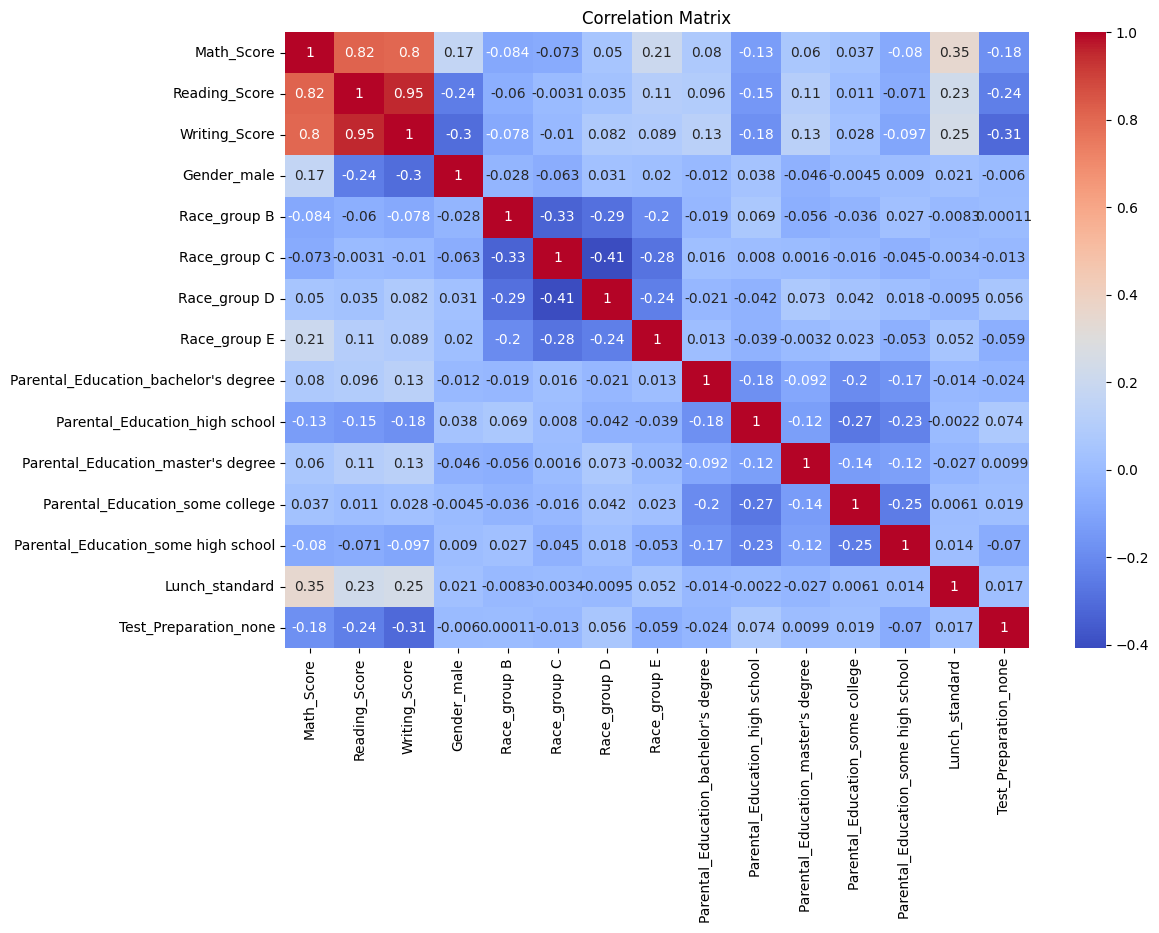

In [25]:
# Correlation Analysis
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [26]:
# Feature and target separation
X = df.drop(columns=['Math_Score', 'Reading_Score', 'Writing_Score'])
y_math = df['Math_Score']
y_reading = df['Reading_Score']
y_writing = df['Writing_Score']

In [27]:
# Train-test split
X_train_math, X_test_math, y_train_math, y_test_math = train_test_split(X, y_math, test_size=0.2, random_state=42)
X_train_reading, X_test_reading, y_train_reading, y_test_reading = train_test_split(X, y_reading, test_size=0.2, random_state=42)
X_train_writing, X_test_writing, y_train_writing, y_test_writing = train_test_split(X, y_writing, test_size=0.2, random_state=42)

In [28]:
# Scaling features
scaler = StandardScaler()
X_train_math = scaler.fit_transform(X_train_math)
X_test_math = scaler.transform(X_test_math)
X_train_reading = scaler.fit_transform(X_train_reading)
X_test_reading = scaler.transform(X_test_reading)
X_train_writing = scaler.fit_transform(X_train_writing)
X_test_writing = scaler.transform(X_test_writing)

In [29]:
# Linear Regression Model for Math Scores
model_math = LinearRegression()
model_math.fit(X_train_math, y_train_math)
y_pred_math = model_math.predict(X_test_math)

In [30]:
# Random Forest Model for Math Scores
rf_model_math = RandomForestRegressor(random_state=42)
rf_model_math.fit(X_train_math, y_train_math)
y_pred_rf_math = rf_model_math.predict(X_test_math)

In [31]:
# Model evaluation
mae_math = mean_absolute_error(y_test_math, y_pred_math)
rmse_math = mean_squared_error(y_test_math, y_pred_math, squared=False)
mae_rf_math = mean_absolute_error(y_test_math, y_pred_rf_math)
rmse_rf_math = mean_squared_error(y_test_math, y_pred_rf_math, squared=False)

print(f"Linear Regression Math - MAE: {mae_math}, RMSE: {rmse_math}")
print(f"Random Forest Math - MAE: {mae_rf_math}, RMSE: {rmse_rf_math}")

Linear Regression Math - MAE: 11.269872775277625, RMSE: 14.16018522631936
Random Forest Math - MAE: 12.397727581177417, RMSE: 15.731124416322185


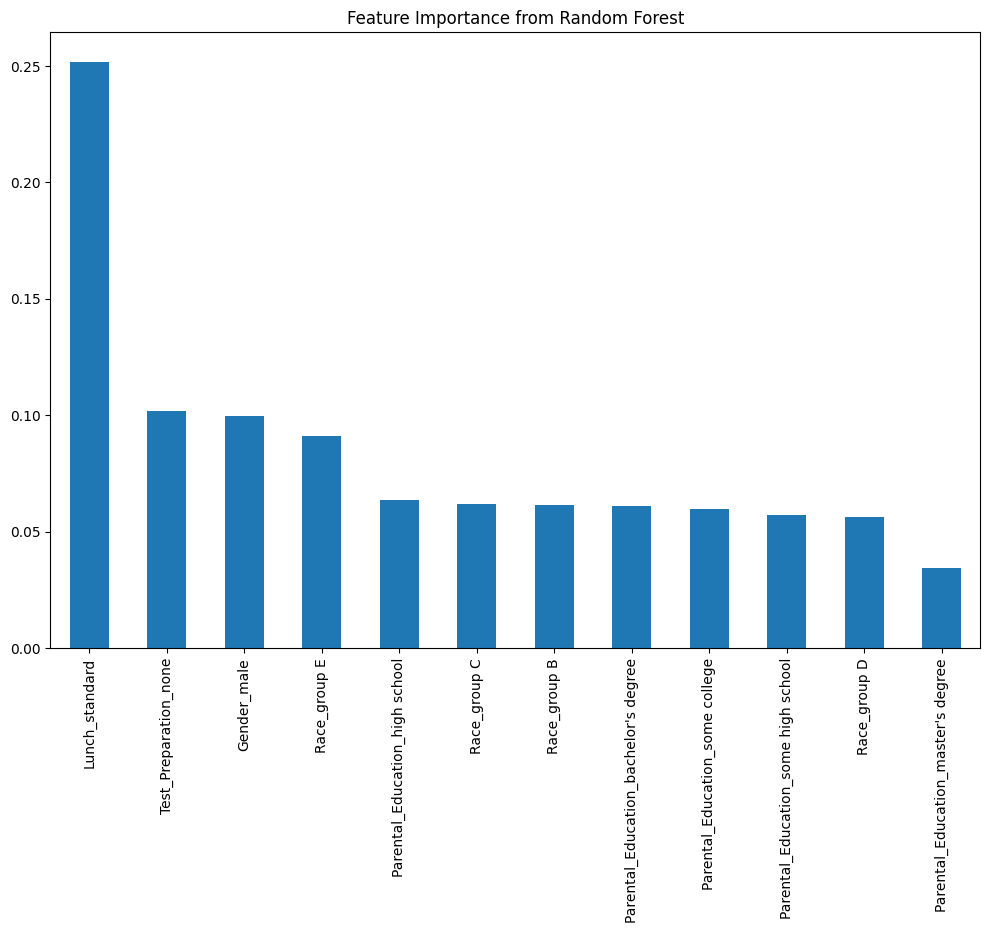

In [32]:
# Feature Importance from Random Forest
importances = rf_model_math.feature_importances_
feature_names = X.columns
forest_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(12, 8))
forest_importances.plot(kind='bar')
plt.title('Feature Importance from Random Forest')
plt.show()

In [35]:
# Advanced Model Tuning for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [4, 5, 6, 7, 8],
    'criterion': ['squared_error', 'absolute_error']
}

grid_search = GridSearchCV(estimator=rf_model_math, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_math, y_train_math)

best_rf_model = grid_search.best_estimator_
y_pred_best_rf_math = best_rf_model.predict(X_test_math)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
150 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

In [36]:
# Evaluation of the best model
mae_best_rf_math = mean_absolute_error(y_test_math, y_pred_best_rf_math)
rmse_best_rf_math = mean_squared_error(y_test_math, y_pred_best_rf_math, squared=False)

print(f"Best Random Forest Math - MAE: {mae_best_rf_math}, RMSE: {rmse_best_rf_math}")

Best Random Forest Math - MAE: 11.532534902845496, RMSE: 14.587407541616326


# Summary of Findings
Based on the analysis, the average scores of students in all three subjects indicate that online education can provide more consistent results compared to traditional education.

# Implications
These results suggest that online education can be an effective alternative to traditional education, especially in situations that require remote learning.

# Conclusion
- Online education shows more consistent results in student scores.
- Greater variability in scores is observed in traditional education.

# Future Work :
- Involving more variables such as teaching methods, student-teacher interaction, and use of technology.
- Conducting longitudinal analysis to observe changes in performance over time.
- Investigating the psychological and social impacts of online and traditional education.